In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
from api_keys import api_key
import json

# Import API key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
cities = []
counter = 0
rep = 'true'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(cities) == 0:
            cities.append(citdict)
            counter = counter + 1
            continue
        else:
            #Eliminating repeats
            for city in cities:
                if city['city'] == citdict['city']:
                    rep = 'true'
        if rep == 'false':
            cities.append(citdict)
            counter = counter + 1
        else:
            rep = 'false'
#Some stuff to check
#print(len(cities))
print(cities[250]) 

{'city': 'willowmore', 'country': 'za', 'lat': -33, 'long': 23}


In [4]:
citypd = pd.DataFrame({ 'city': [x['city'] for x in cities], 'country': [x['country'] for x in cities],})
                                
OurCities = citypd.sample(500)

#Checking Stuff Our Format is: id / city /country
print(OurCities)

                city country
4442          panjab      af
4158          pishin      pk
5005       terrasini      it
5638      dumbraveni      ro
6987       waterfoot      gb
1737          jardim      br
4391     arkadelphia      us
2120       ugoofaaru      mv
4863      waynesboro      us
1713          palora      ec
5214        kankakee      us
1342          labrea      br
1659          manaus      br
4759         sajanan      tn
426          natalio      py
2810     phetchaburi      th
1655       tonantins      br
4248        qandahar      af
1050           posse      br
3726           abnub      eg
7628       kysyl-syr      ru
4217         eufaula      us
1267            uaua      br
1223          likasi      cd
1365       namanyere      tz
4334           tabas      ir
6963      magdagachi      ru
1199        mazamari      pe
15            hobart      au
1742         gamboma      cg
...              ...     ...
3206      agua dulce      mx
4364           omura      jp
1067   kapiri 

In [6]:
api_key = "4971a7997286c0fe0ad26f6c5c1407f2"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
counter = 0
OurCities['latitude'] = ""
OurCities['longitude'] = ""
OurCities['temperature'] = ""
OurCities['humidity'] = ""
OurCities['cloudiness'] = ""
OurCities['wind_speed'] = ""

for index,row in OurCities.iterrows():
    counter = counter + 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']    
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
        #Pulling our data
        OurCities.set_value(index, "latitude", int(cityweather['coord']['lat']))
        OurCities.set_value(index, "longitude", int(cityweather['coord']['lat']))
        OurCities.set_value(index, "temperature", int(cityweather['main']['temp']))
        OurCities.set_value(index, "humidity", int(cityweather['main']['humidity']))
        OurCities.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        OurCities.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"City Count: {counter}")
    print(f"We're looking at {row['city']}" )
    print(f"The URL we found is {query_url}")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\s

City Count: 1
We're looking at panjab
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=panjab
City Count: 2
We're looking at pishin
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=pishin
City Count: 3
We're looking at terrasini
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=terrasini
City Count: 4
We're looking at dumbraveni
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=dumbraveni
City Count: 5
We're looking at waterfoot
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=waterfoot
City Count: 6
We're looking at jardim
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c140

No data for this city: samusu
City Count: 50
We're looking at samusu
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=samusu
City Count: 51
We're looking at ulagan
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=ulagan
City Count: 52
We're looking at shurugwi
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=shurugwi
City Count: 53
We're looking at volksrust
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=volksrust
City Count: 54
We're looking at shuangcheng
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=shuangcheng
No data for this city: shchuchye
City Count: 55
We're looking at shchuchye
The URL we found is http://api

City Count: 96
We're looking at moosomin
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=moosomin
City Count: 97
We're looking at la rosa
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=la rosa
City Count: 98
We're looking at anakapalle
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=anakapalle
City Count: 99
We're looking at sungaipenuh
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=sungaipenuh
City Count: 100
We're looking at xingcheng
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=xingcheng
City Count: 101
We're looking at luang prabang
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971

City Count: 142
We're looking at temyasovo
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=temyasovo
City Count: 143
We're looking at itamarandiba
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=itamarandiba
City Count: 144
We're looking at sao joao da ponte
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=sao joao da ponte
City Count: 145
We're looking at badulla
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=badulla
City Count: 146
We're looking at ouadda
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=ouadda
City Count: 147
We're looking at uruguaiana
The URL we found is http://api.openweathermap.org/data/2.5/weath

City Count: 190
We're looking at ippy
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=ippy
City Count: 191
We're looking at challans
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=challans
City Count: 192
We're looking at distraccion
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=distraccion
City Count: 193
We're looking at mabaruma
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=mabaruma
City Count: 194
We're looking at songling
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=songling
City Count: 195
We're looking at whakatane
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe

City Count: 238
We're looking at ginir
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=ginir
City Count: 239
We're looking at podyuga
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=podyuga
City Count: 240
We're looking at prince albert
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=prince albert
City Count: 241
We're looking at codo
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=codo
City Count: 242
We're looking at krasnoarmeysk
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=krasnoarmeysk
City Count: 243
We're looking at ankazoabo
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a79972

City Count: 285
We're looking at suntar
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=suntar
No data for this city: tawnat
City Count: 286
We're looking at tawnat
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=tawnat
City Count: 287
We're looking at kalyazin
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=kalyazin
City Count: 288
We're looking at rawson
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=rawson
No data for this city: taburao
City Count: 289
We're looking at taburao
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=taburao
City Count: 290
We're looking at conde
The URL we found is http://api.openweatherma

No data for this city: bur gabo
City Count: 332
We're looking at bur gabo
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=bur gabo
City Count: 333
We're looking at levelek
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=levelek
City Count: 334
We're looking at terrace
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=terrace
City Count: 335
We're looking at kirkwall
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=kirkwall
City Count: 336
We're looking at portree
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=portree
City Count: 337
We're looking at tourlaville
The URL we found is http://api.openweathermap.org/data/2.5/

City Count: 380
We're looking at chopovychi
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=chopovychi
City Count: 381
We're looking at collie
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=collie
No data for this city: dera baba nanak
City Count: 382
We're looking at dera baba nanak
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=dera baba nanak
City Count: 383
We're looking at rochegda
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=rochegda
City Count: 384
We're looking at rudnya
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=rudnya
City Count: 385
We're looking at knysna
The URL we found is http://api.openweathe

No data for this city: azar shahr
City Count: 427
We're looking at azar shahr
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=azar shahr
City Count: 428
We're looking at seligenstadt
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=seligenstadt
City Count: 429
We're looking at mishkino
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=mishkino
No data for this city: tingrela
City Count: 430
We're looking at tingrela
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=tingrela
City Count: 431
We're looking at akureyri
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=akureyri
City Count: 432
We're looking at acacias
The URL we 

City Count: 474
We're looking at niono
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=niono
City Count: 475
We're looking at kardla
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=kardla
City Count: 476
We're looking at nkoteng
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=nkoteng
City Count: 477
We're looking at lavrentiya
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=lavrentiya
No data for this city: kollumerland
City Count: 478
We're looking at kollumerland
The URL we found is http://api.openweathermap.org/data/2.5/weather?appid=4971a7997286c0fe0ad26f6c5c1407f2&units=Imperial&q=kollumerland
City Count: 479
We're looking at elk point
The URL we found is http://api.openweathermap.org/d

In [8]:
OurCities = OurCities[OurCities.latitude != ""]
print(OurCities)

                      city country latitude longitude temperature humidity  \
4442                panjab      af       34        34          38       79   
4158                pishin      pk       30        30          52       40   
5005             terrasini      it       38        38          68       52   
5638            dumbraveni      ro       46        46          49       66   
6987             waterfoot      gb       53        53          56       77   
1737                jardim      br      -21       -21          84       70   
4391           arkadelphia      us       34        34          66       73   
2120             ugoofaaru      mv        5         5          83      100   
4863            waynesboro      us       35        35          64       93   
1713                palora      ec       -1        -1          68      100   
5214              kankakee      us       41        41          66       41   
1659                manaus      br       -3        -3          9

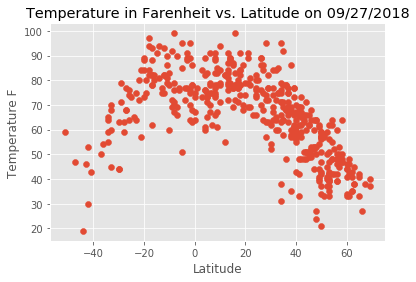

In [23]:
#Constructing Figure 1: Temperature vs Latitude

#Finally using the time dependency
date = time.strftime("%m/%d/%Y")

plt.scatter(OurCities['latitude'],OurCities['temperature'])

plt.title(f"Temperature in Farenheit vs. Latitude on {date}")

plt.xlabel("Latitude")

plt.ylabel("Temperature F")

plt.style.use('ggplot')

plt.savefig("Figures/Figure_1.png")

plt.show()

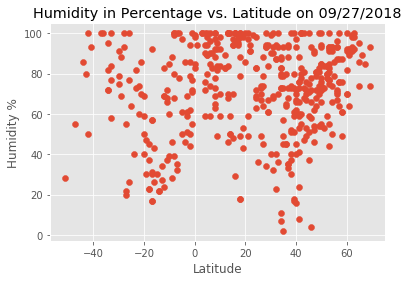

In [24]:
#Constructing Figure 2: Humidity vs Latitude
plt.scatter(OurCities['latitude'], OurCities['humidity'])

plt.title(f"Humidity in Percentage vs. Latitude on {date}")

plt.xlabel("Latitude")

plt.ylabel("Humidity %")

plt.style.use('ggplot')

plt.savefig("Figures/Figure_2.png")

plt.show()

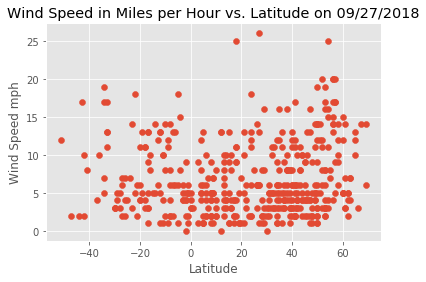

In [25]:
#Constructing Figure 3: Wind Speed vs Latitude
plt.scatter(OurCities['latitude'], OurCities['wind_speed'])

plt.title(f"Wind Speed in Miles per Hour vs. Latitude on {date}")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed mph")

plt.style.use('ggplot')

plt.savefig("Figures/Figure_3.png")

plt.show()

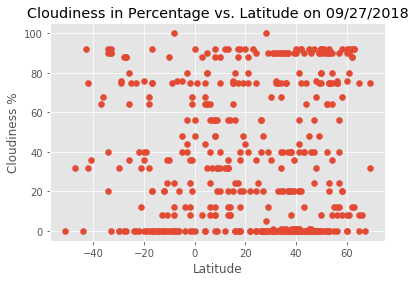

In [26]:
#Constructing Figure 4: Cloudiness vs Latitude
plt.scatter(OurCities['latitude'], OurCities['cloudiness'])

plt.title(f"Cloudiness in Percentage vs. Latitude on {date}")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness %")

plt.style.use('ggplot')

plt.savefig("Figures/Figure_4.png")

plt.show()

In [27]:
OurCities.to_csv("Figures/Weatherin500Cities.csv", encoding="utf-8", index=False)
df = pd.read_csv("Weatherin500Cities.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,panjab,af,34,34,38,79,68,1
1,pishin,pk,30,30,52,40,0,2
2,terrasini,it,38,38,68,52,40,16
3,dumbraveni,ro,46,46,49,66,40,2
4,waterfoot,gb,53,53,56,77,75,8
